## Team 19
1. Josetian Halim Maha Budi - Universitas Negeri Semarang (Group Leader)
2. Muhammad Yusuf Bahtiar - Universitas Pendidikan Indonesia (Group Member)
3. Talitha Fayarina Adhigunawan - Universitas Pendidikan Indonesia (Group Member)
4. Noor Shazreen binti Mortadza - Universitas Sebelas Maret (Group Member)
5. Imelda Pangaribuan - Universiti Malaysia Terengganu (Group Member)
6. Raden Fadhil Anugerah Ardiwilaga - Universitas Pendidikan Indonesia (Group Member)
7. Mochamad Khaairi - Universitas Pendidikan Indonesia (Group Member)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/orderdataset.csv', sep=';');
df.head()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,05/09/2016,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,03/10/2016,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,03/10/2016,e-wallet,fashion,500.0


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


**purchase_date** in object format, need to convert to datetime

In [ ]:
df.isna().sum()

order_id                  0
quantity                  0
product_id                0
price                     0
seller_id                 0
freight_value             0
customer_id               0
order_status              0
purchase_date             0
payment_type              0
product_category_name     0
product_weight_gram      19
dtype: int64

there is missing value on **product_weight_gram**, so pre-processing must be done

## Data Cleaning

Do imputation for missing value in **product_weight_gram** by filling in the average weight of products by category, assuming that each category of products has the same average weight

In [ ]:
mean_weight_per_category = df.groupby('product_category_name')['product_weight_gram'].mean()

df['product_weight_gram'] = df.apply(
    lambda row: mean_weight_per_category[row['product_category_name']] if pd.isnull(row['product_weight_gram']) else row['product_weight_gram'],
    axis=1
)

df.isna().sum()

order_id                 0
quantity                 0
product_id               0
price                    0
seller_id                0
freight_value            0
customer_id              0
order_status             0
purchase_date            0
payment_type             0
product_category_name    0
product_weight_gram      0
dtype: int64

convert **purchase_date** to datetime

In [ ]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'], dayfirst=True)
print("After convert':", df['purchase_date'].dtype)

After convert': datetime64[ns]


In [ ]:
df.head()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,2016-10-03,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-03,e-wallet,fashion,500.0


In [ ]:
df.describe()

,quantity,price,freight_value,purchase_date,product_weight_gram
count,49999.000000,4.999900e+04,49999.000000,49999,49999.000000
mean,1.197484,2.607784e+06,104521.390428,2017-08-06 19:05:41.214824448,2201.832281
min,1.000000,2.000000e+05,9000.000000,2016-09-05 00:00:00,50.000000
25%,1.000000,1.410500e+06,57000.000000,2017-05-24 00:00:00,300.000000
50%,1.000000,2.610000e+06,104000.000000,2017-08-21 00:00:00,800.000000
75%,1.000000,3.810000e+06,152000.000000,2017-11-03 00:00:00,1850.000000
max,21.000000,5.000000e+06,200000.000000,2017-12-15 00:00:00,40425.000000
std,0.722262,1.388312e+06,55179.844962,NaN,3929.150248


- It can be seen from the data above that the maximum price for purchasing product in one order is 5.000.000 and the minimum is 200.000
- The maximum for quantity in one order is 21 items and the minimum is only 1 item

In [ ]:
quantity_per_product = df.groupby('product_category_name')['quantity'].sum().sort_values(ascending=False)
print(quantity_per_product)

product_category_name
toys           7705
electronics    7537
automotive     7504
fashion        7486
beauty         7452
sports         7411
gadget         7393
utilities      7385
Name: quantity, dtype: int64


In [ ]:
df.groupby('product_category_name')['price'].sum().sort_values(ascending=False)

product_category_name
toys           16604282000
automotive     16493552000
fashion        16433729000
beauty         16272726000
electronics    16248782000
sports         16222582000
gadget         16063418000
utilities      16047517000
Name: price, dtype: int64

In [ ]:
df.groupby('product_category_name')['quantity'].max().sort_values(ascending=False)

product_category_name
utilities      21
beauty         20
electronics    20
toys           19
fashion        18
sports         17
gadget         15
automotive     14
Name: quantity, dtype: int64

In [ ]:
df.groupby('payment_type')['price'].sum().sort_values(ascending=False)

payment_type
virtual account    32959530000
debit card         32576542000
credit card        32503620000
e-wallet           32346896000
Name: price, dtype: int64

In [ ]:
df['payment_type'].value_counts()

payment_type
virtual account    12581
credit card        12498
debit card         12472
e-wallet           12448
Name: count, dtype: int64

In [ ]:
df['order_status'].value_counts()

order_status
delivered      48664
shipped          567
processing       270
canceled         267
invoiced         221
unavailable        7
approved           3
Name: count, dtype: int64

In [ ]:
df['customer_id'].value_counts()

customer_id
fc3d1daec319d62d49bfb5e1f83123e9    21
bd5d39761aa56689a265d95d8d32b8be    20
10de381f8a8d23fff822753305f71cae    15
adb32467ecc74b53576d9d13a5a55891    15
d5f2b3f597c7ccafbb5cac0bcc3d6024    14
                                    ..
c5a2778a8dbd64d32e3d0ee4995539a0     1
fed7a1c4146b45f0ddb2b285da5379cf     1
061eaa12db459fd7f6ba6a8b01f47652     1
7f98b1c191f40cc88ba51d1c70383621     1
60d2d93a97ec1ad751f2ddce9249ba2a     1
Name: count, Length: 42694, dtype: int64

In [ ]:
customer_counts = df['customer_id'].value_counts()

order_frequency = customer_counts.value_counts()

single_order_customers = order_frequency.get(1, 0)
print("The number of customer_ids that have only 1 order:", single_order_customers)

The number of customer_ids that have only 1 order: 37409


From the data above, it can be seen that many customers only make one transaction

**recommendation:**
*   explore why many customers only make one transaction, whether because of service or because of competitors



# Data Visualization

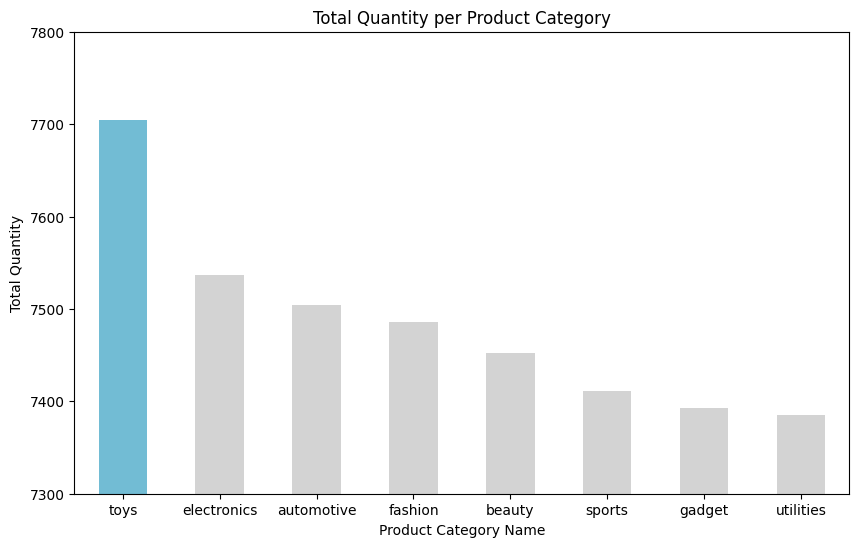

In [ ]:
plt.figure(figsize=(10, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
quantity_per_product.plot(kind='bar', color=colors)
plt.title('Total Quantity per Product Category')
plt.xlabel('Product Category Name')
plt.ylabel('Total Quantity')
plt.ylim(7300, 7800)
plt.xticks(rotation=0)
plt.show()

From the graph, it can be seen that there is a significant difference in the total quantity of toys sold.

**Recommendation** :


*   In response to this, the stock of goods from the toy category can be further increased or increase the stock of goods from the top 4 categories.
*   Analyze customer feedback to enhance product offerings and boost sales in low-performing categories.

<ipython-input-47-8d7be4cfdc0a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-47-8d7be4cfdc0a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


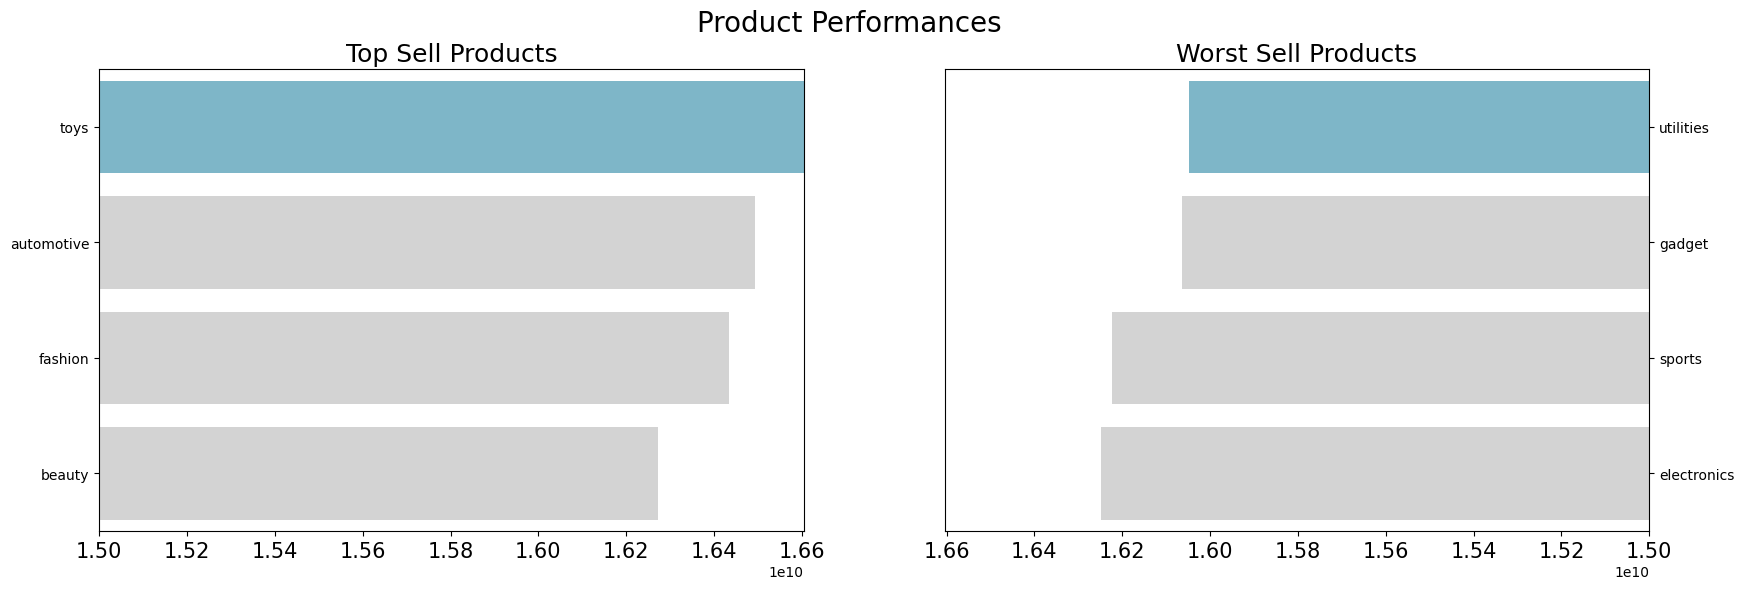

In [ ]:
aggregated_data = df.groupby('product_category_name')['price'].sum().reset_index()

most = aggregated_data.sort_values(by='price', ascending=False)
less = aggregated_data.sort_values(by='price', ascending=True)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y='product_category_name',
    x='price',
    data=most.head(4),
    palette=colors,
    ax=ax[0]
)
ax[0].set_xlim(15000000000, most['price'].max())
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top Sell Products", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(
    y='product_category_name',
    x='price',
    data=less.head(4),
    palette=colors,
    ax=ax[1]
)
ax[1].set_xlim(15000000000, less['price'].max())
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Sell Products", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Product Performances", fontsize=20)
plt.show()

From graph above

<ipython-input-74-8d8842282f65>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-74-8d8842282f65>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


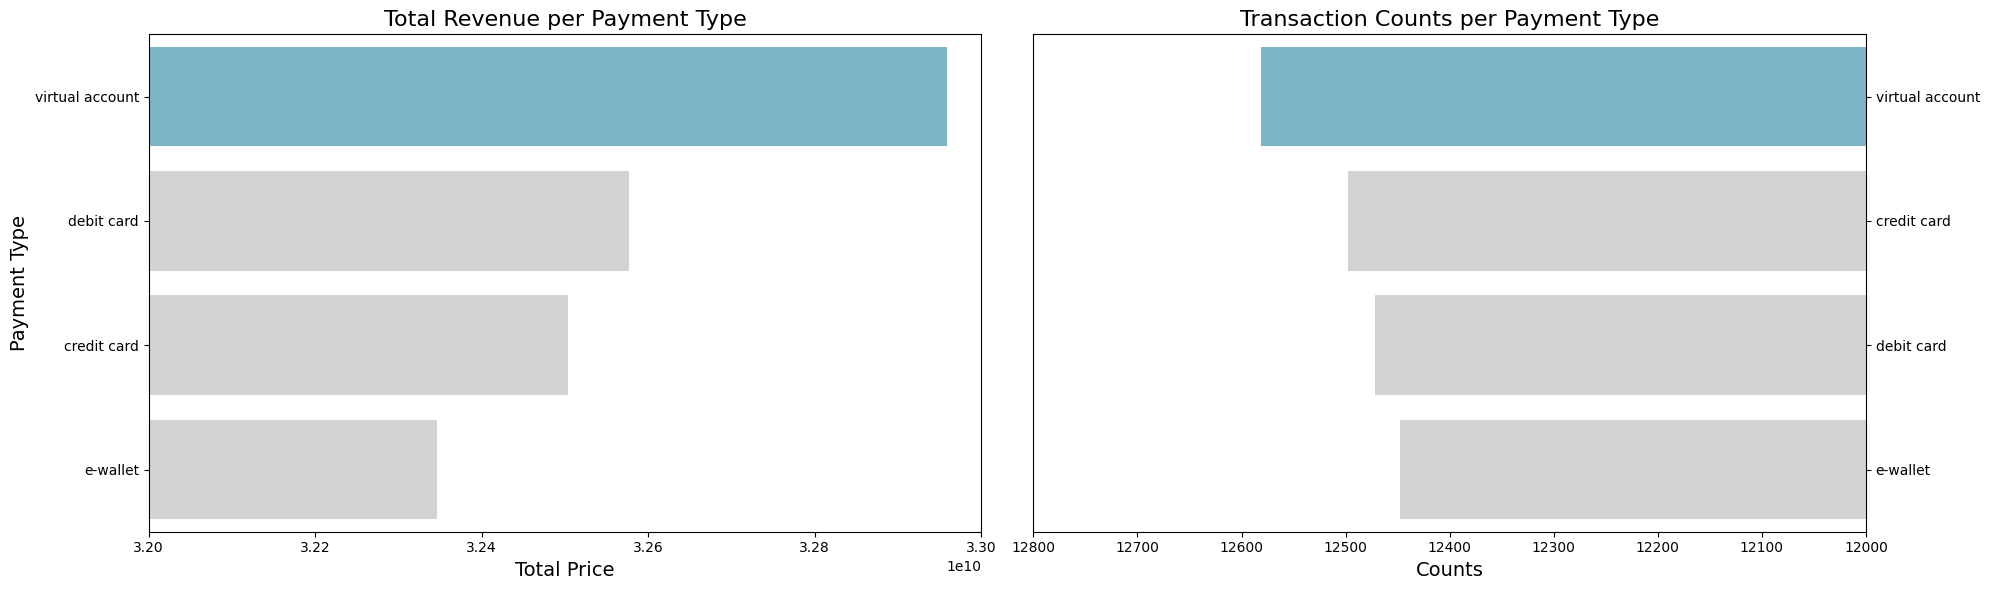

In [ ]:
payment_price = df.groupby('payment_type')['price'].sum().sort_values(ascending=False).reset_index()
payment_counts = df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'counts']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x='price',
    y='payment_type',
    data=payment_price,
    palette=colors,
    ax=ax[0]
)
ax[0].set_xlim(32000000000, 33000000000)
ax[0].set_title('Total Revenue per Payment Type', fontsize=16)
ax[0].set_xlabel('Total Price', fontsize=14)
ax[0].set_ylabel('Payment Type', fontsize=14)

sns.barplot(
    x='counts',
    y='payment_type',
    data=payment_counts,
    palette=colors,
    ax=ax[1]
)
ax[1].set_xlim(12000, 12800)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
ax[1].set_title('Transaction Counts per Payment Type', fontsize=16)
ax[1].set_xlabel('Counts', fontsize=14)

plt.tight_layout()
plt.show()

The graph indicates that virtual accounts are the most frequently used payment method compared to other options.

Recommendations:
*   Focus on promoting the most popular payment methods to maintain and enhance their usage.
*   Explore and implement incentives to encourage the use of less utilized payment methods, aiming for a more balanced distribution.

<ipython-input-87-cf2e1277c932>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


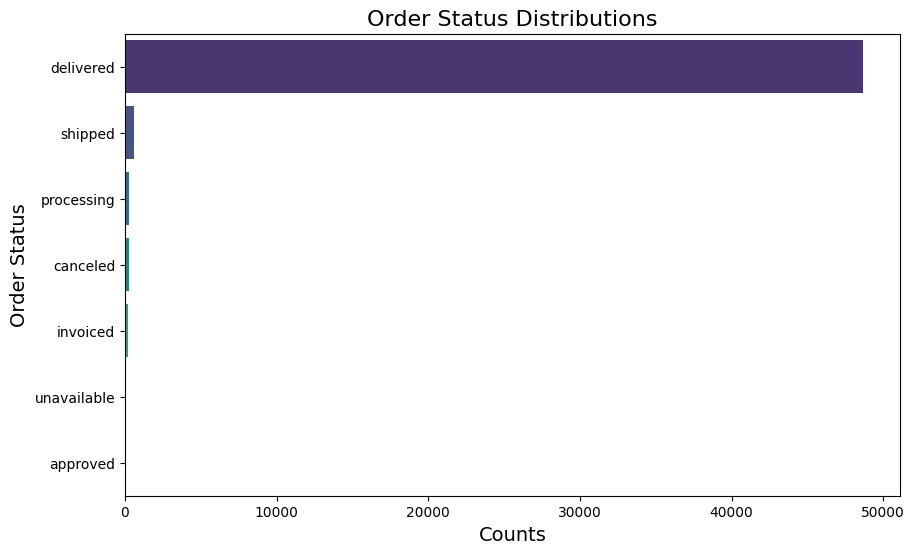

In [ ]:
order_status_counts = df['order_status'].value_counts().reset_index()
order_status_counts.columns = ['order_status', 'counts']

plt.figure(figsize=(10, 6))
sns.barplot(
    x='counts',
    y='order_status',
    data=order_status_counts,
    palette="viridis"
)
plt.title('Order Status Distributions', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Order Status', fontsize=14)
plt.show()

The order status graph shows a significant number of orders canceled by buyers.

**Recommendations**:
*   Investigate the reasons behind the high cancellation rates to identify underlying issues.
*   Implement measures to reduce cancellations, such as improving customer communication and enhancing return policies.

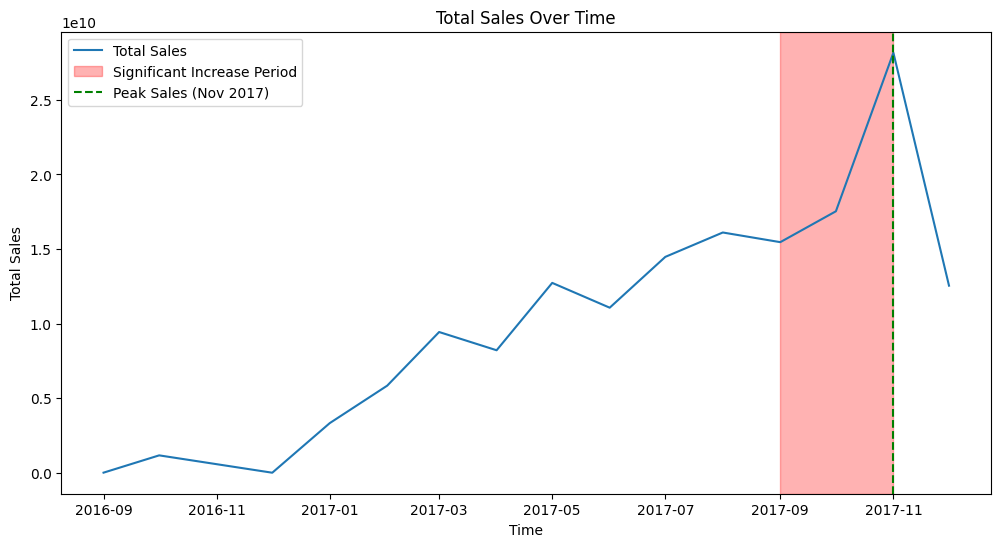

In [ ]:
df['total_sales'] = df['price'] * df['quantity']
df['purchase_date'] = pd.to_datetime(df['purchase_date'], format='%d/%m/%Y')
sales_over_time = df.groupby(df['purchase_date'].dt.to_period('M'))['total_sales'].sum()
sales_over_time.index = sales_over_time.index.to_timestamp()

period_of_interest_start = pd.Timestamp('2017-09-01')
period_of_interest_end = pd.Timestamp('2017-11-01')

plt.figure(figsize=(12, 6))
plt.plot(sales_over_time, label='Total Sales')
plt.axvspan(period_of_interest_start, period_of_interest_end, color='red', alpha=0.3, label='Significant Increase Period')

max_sales_month = sales_over_time.idxmax()
plt.axvline(max_sales_month, color='green', linestyle='--', label=f'Peak Sales ({max_sales_month.strftime("%b %Y")})')

plt.title('Total Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

The graph illustrates the total sales trends over time. Notably, there was a significant surge in sales in November 2017. However, following this peak, total sales experienced a sharp decline.

**Recommendations**:


*   Collect customer feedback to understand their needs and preferences better
*   Identify the factors that contributed to the sales surge in November 2017 and understand the reasons behind the subsequent decline. This can include seasonal trends, promotional activities, market conditions, or external events.

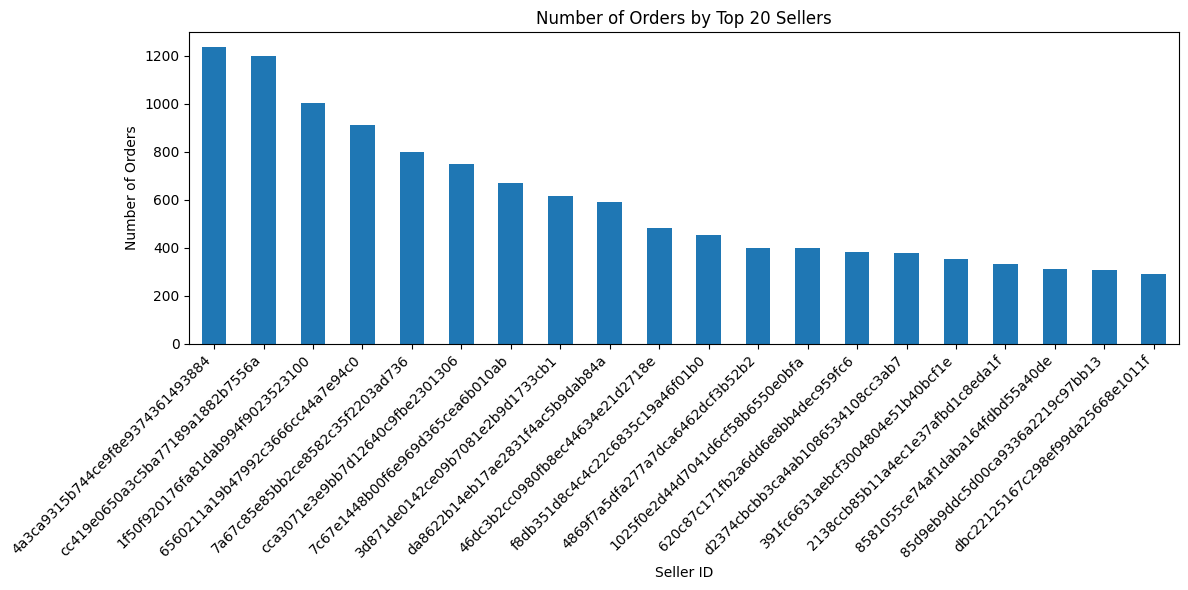

In [ ]:
# Number of Orders by Seller
orders_by_seller = df['seller_id'].value_counts()

top_sellers = orders_by_seller.head(20)

plt.figure(figsize=(12, 6))
ax = top_sellers.plot(kind='bar')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Number of Orders by Top 20 Sellers')
plt.xlabel('Seller ID')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

The graph reveals that a few sellers have exceptionally high sales levels compared to others.

Possible Solutions:


*   Provide training and resources to support low-performing sellers, helping them enhance their sales performance.
*   Highlight and promote high-performing sellers to recognize their success and potentially inspire others.